In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from preprocess import load_data, handle_missing_values, clean_data, merge_datasets, feature_engineering


In [2]:
fraud_path = '../data/Fraud_Data.csv'
ip_path = '../data/IpAddress_to_Country.csv'
fraud_df, ip_df = load_data(fraud_path, ip_path)

In [3]:
# Handle missing values
fraud_df = handle_missing_values(fraud_df)

# Clean data
fraud_df = clean_data(fraud_df)

# Convert ip_address to integer and fill ip_int
fraud_df['ip_int'] = fraud_df['ip_address']

# Merge datasets
fraud_df = merge_datasets(fraud_df, ip_df)

# Feature engineering
fraud_df = feature_engineering(fraud_df)

Missing values:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [4]:
# Univariate Analysis
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Purchase Value')

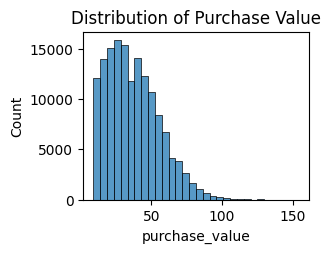

In [5]:
# Purchase Value
plt.subplot(2, 2, 1)
sns.histplot(fraud_df['purchase_value'], bins=30)
plt.title('Distribution of Purchase Value')

Text(0.5, 1.0, 'Distribution of Age')

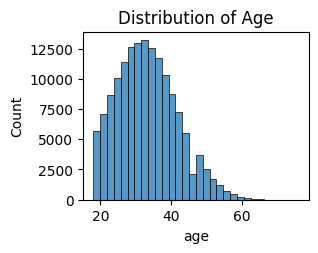

In [6]:
# Age
plt.subplot(2, 2, 2)
sns.histplot(fraud_df['age'], bins=30)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Hour of Day')

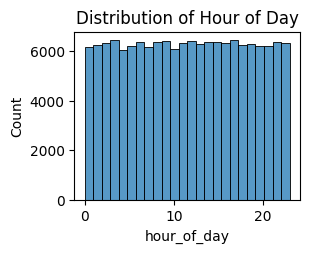

In [7]:
# Hour of Day
plt.subplot(2, 2, 3)
sns.histplot(fraud_df['hour_of_day'], bins=24)
plt.title('Distribution of Hour of Day')

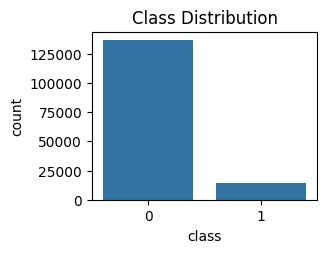

In [8]:
# Class Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='class', data=fraud_df)
plt.title('Class Distribution')
plt.show()

In [9]:
# Bivariate Analysis
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Purchase Value by Class')

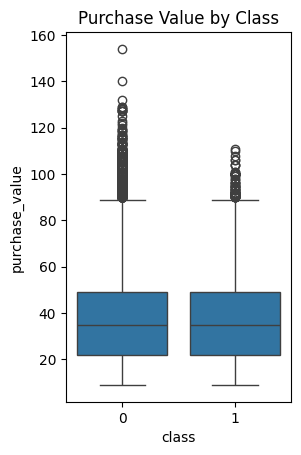

In [10]:
# Purchase Value vs Class
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Class')

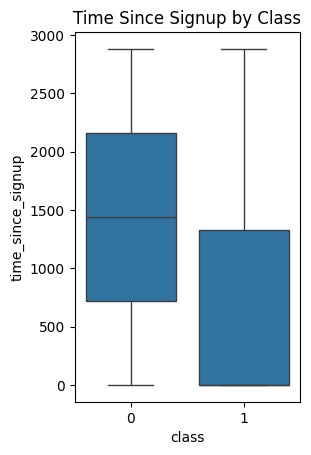

In [11]:
# Time Since Signup vs Class
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='time_since_signup', data=fraud_df)
plt.title('Time Since Signup by Class')
plt.show()

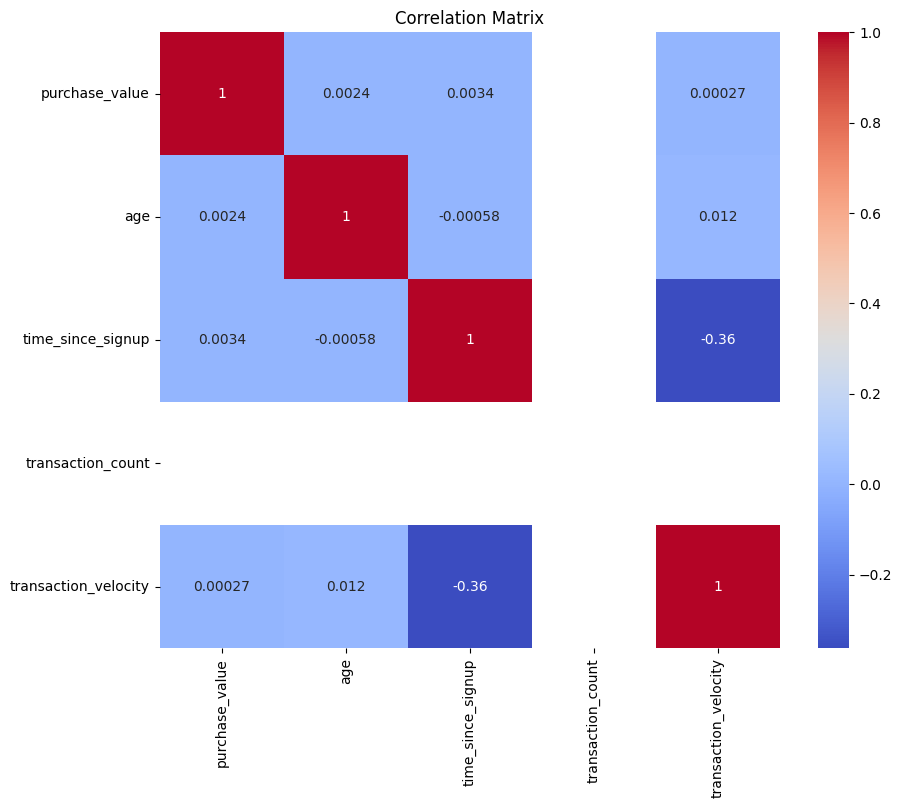

In [12]:
# Correlation Matrix
numerical_cols = ['purchase_value', 'age', 'time_since_signup', 'transaction_count', 'transaction_velocity']
plt.figure(figsize=(10, 8))
sns.heatmap(fraud_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Class Imbalance Analysis
class_counts = fraud_df['class'].value_counts()
print('Class Distribution:\n', class_counts)
print('Fraud Percentage:', class_counts[1] / class_counts.sum() * 100, '%')

Class Distribution:
 class
0    136961
1     14151
Name: count, dtype: int64
Fraud Percentage: 9.364577267192546 %
